In [1]:
import numpy as np 
import pandas as pd 

import nltk
# nltk.download("stopwords")
from nltk.corpus import stopwords 

import re
from collections import Counter

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
PATH_TRAIN_DATA = '../data/train.tsv'
PATH_TEST_DATA = '../data/test.tsv'

In [3]:
train_data = pd.read_csv(PATH_TRAIN_DATA, sep = '\t')

In [4]:
train_data.head()

,title,content
0,"Singer, activist Joan Baez becomes Kennedy Cen...",Kennedy Center Honoree Joan Baez reflects on 6...
1,'Nothing but problems': Shipwreck tear-down en...,Demolition of a large cargo ship along the coa...
2,Report: At least 13 dead in Istanbul bombings,Report : At least 13 dead in Istanbul bombings...
3,Senate Republicans Pressure Joe Biden to Withd...,Several congressional Republicans are expressi...
4,The Unwelcome Return of the Real Purveyors of ...,With the mainstream media still obsessing abou...


In [5]:
train_data.shape

(89928, 2)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89928 entries, 0 to 89927
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    89923 non-null  object
 1   content  89800 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [8]:
# buscamos nulos y limpiamos
print(train_data.isna().sum())
train_data_clean = train_data.dropna().reset_index(drop=True)
print(train_data.shape)


title        5
content    128
dtype: int64
(89928, 2)


In [10]:
# longitud del texto
train_data_clean['len_title'] = train_data_clean['title'].apply(lambda x: len(x))
train_data_clean['len_content'] = train_data_clean['content'].apply(lambda x: len(x))
train_data_clean.head()

,title,content,len_title,len_content
0,"Singer, activist Joan Baez becomes Kennedy Cen...",Kennedy Center Honoree Joan Baez reflects on 6...,57,118
1,'Nothing but problems': Shipwreck tear-down en...,Demolition of a large cargo ship along the coa...,60,5270
2,Report: At least 13 dead in Istanbul bombings,Report : At least 13 dead in Istanbul bombings...,45,201
3,Senate Republicans Pressure Joe Biden to Withd...,Several congressional Republicans are expressi...,77,4841
4,The Unwelcome Return of the Real Purveyors of ...,With the mainstream media still obsessing abou...,54,3838


In [12]:
# limpieza de texto
def preprocess_text(text: str) -> str:
    """
    limpieza de caracteres extraños y eliminacion de stopwords
    """
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)

    # remove stopwords
    tokens = nltk.word_tokenize(text)
    tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
    text = " ".join(tokens)
    text = text.lower().strip()

    return text

In [13]:
# limpieza de title
train_data_clean['title_clean'] = train_data_clean['title'].apply(lambda text: preprocess_text(text))
train_data_clean.head()

,title,content,len_title,len_content,title_clean
0,"Singer, activist Joan Baez becomes Kennedy Cen...",Kennedy Center Honoree Joan Baez reflects on 6...,57,118,singer activist joan baez becomes kennedy cent...
1,'Nothing but problems': Shipwreck tear-down en...,Demolition of a large cargo ship along the coa...,60,5270,nothing problems shipwreck tear enters th month
2,Report: At least 13 dead in Istanbul bombings,Report : At least 13 dead in Istanbul bombings...,45,201,report least dead istanbul bombings
3,Senate Republicans Pressure Joe Biden to Withd...,Several congressional Republicans are expressi...,77,4841,senate republicans pressure joe biden withdraw...
4,The Unwelcome Return of the Real Purveyors of ...,With the mainstream media still obsessing abou...,54,3838,unwelcome return real purveyors violence


In [15]:
# analisis de palabras de title
title_corpus = " ".join(train_data_clean['title_clean']).split(" ")
print(len(title_corpus))
print(title_corpus[:10])

707314
['singer', 'activist', 'joan', 'baez', 'becomes', 'kennedy', 'center', 'honoree', 'nothing', 'problems']


In [17]:
word_counter = dict(Counter(title_corpus))
title_df_counter = pd.DataFrame(
    data = {
            'word': [word for word in word_counter.keys()],
            'count': [number for number in word_counter.values()]
    }
)
title_df_counter = title_df_counter.sort_values('count', ascending=False).reset_index(drop=True)
title_df_counter.head(20)

,word,count
0,covid,7098
1,biden,5058
2,trump,4545
3,new,4419
4,says,3034
5,us,2958
6,police,2686
7,vaccine,2450
8,u,2373
9,man,2319


In [22]:
fig = px.bar(title_df_counter.head(50), x='word', y='count',title="top 50 title word count")
fig.show()

In [25]:
title_df_counter.shape

(35474, 2)

In [38]:
(title_df_counter['count'] > 100).value_counts()

count
False    34022
True      1452
Name: count, dtype: int64

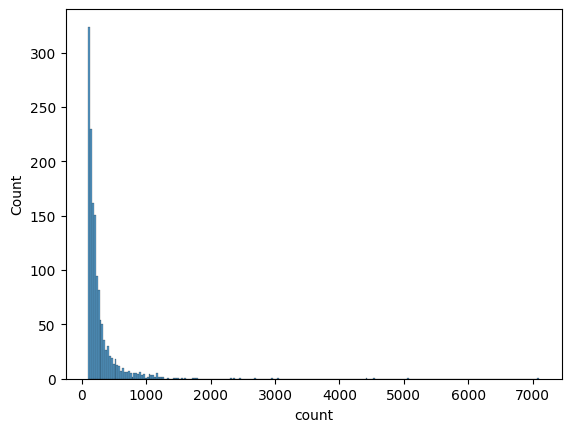

In [46]:
# histograma de densidad de palabras
sns.histplot(data=title_df_counter[title_df_counter['count'] > 100], x="count")
plt.show()

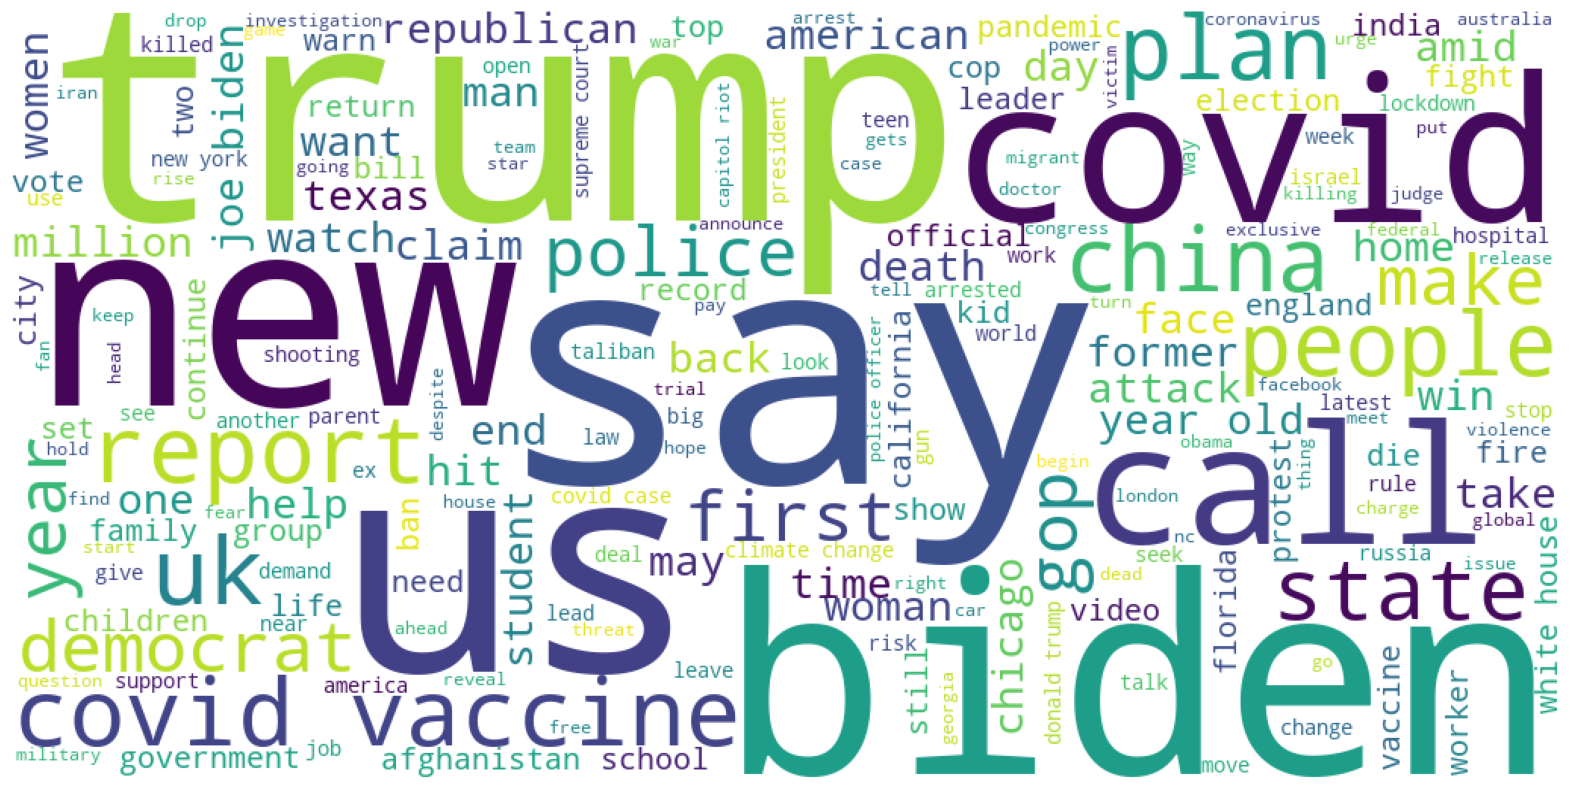

In [49]:
# wordcount
wordcloud = WordCloud(
                    background_color = 'white',
                    width = 1024,
                    height = 512
                ).generate(' '.join([word for word in title_corpus if len(word) > 1]))
        
plt.figure(figsize = (20,10))
plt.imshow(wordcloud,
            aspect='auto'
        ) 
plt.axis('off')
plt.show()

In [50]:
# limpieza de content
train_data_clean['content_clean'] = train_data_clean['content'].apply(lambda text: preprocess_text(text))
train_data_clean.head()

In [ ]:
# analisis de palabras de title
content_corpus = " ".join(train_data_clean['content_clean']).split(" ")
print(len(content_corpus))
print(content_corpus[:10])

In [ ]:
word_counter = dict(Counter(title_corpus))
content_df_counter = pd.DataFrame(
    data = {
            'word': [word for word in word_counter.keys()],
            'count': [number for number in word_counter.values()]
    }
)
content_df_counter = content_df_counter.sort_values('count', ascending=False).reset_index(drop=True)
content_df_counter.head(20)

In [16]:
# analizamos title por palabras

title_corpus = []
titles = train_data_eda['title']
for i in tqdm(range(len(titles))):
    title = re.sub('^[a-zA-Z]', ' ', titles[i])

    char_to_replace = ['\'', '"', ':', ',', '`', '´', '’', '”']
    for char in char_to_replace:
        title = title.replace(char, '')
    # title = title.replace("'", '')
    # title = title.replace(":", '')
    title = title.lower()
    title = title.split()
    # quitamos stopwords
    title = [word for word in title if word not in stopwords.words('english')]
    title = ' '.join(title)
    title_corpus.append(title)

100%|██████████| 89795/89795 [02:34<00:00, 579.82it/s]


In [17]:
title_corpus = " ".join(title_corpus).split(" ")
title_corpus[:10]

['inger',
 'activist',
 'joan',
 'baez',
 'becomes',
 'kennedy',
 'center',
 'honoree',
 'nothing',
 'problems']

In [18]:
word_counter = dict(Counter(title_corpus))
title_df_counter = pd.DataFrame(
    data = {
            'word': [word for word in word_counter.keys()],
            'count': [number for number in word_counter.values()]
    }
)
title_df_counter = title_df_counter.sort_values('count', ascending=False)
title_df_counter.head(20)

,word,count
300,new,3487
125,says,3020
223,covid,2886
1018,trump,2643
25,biden,2375
292,vaccine,2292
415,police,2247
468,us,1960
182,covid-19,1952
165,people,1577


In [24]:
fig = px.bar(title_df_counter.head(30), x='word', y='count',title="top 20 title word count")
fig.show()

In [25]:
fig = px.bar(title_df_counter.tail(30), x='word', y='count',title="top 20 title word count")
fig.show()

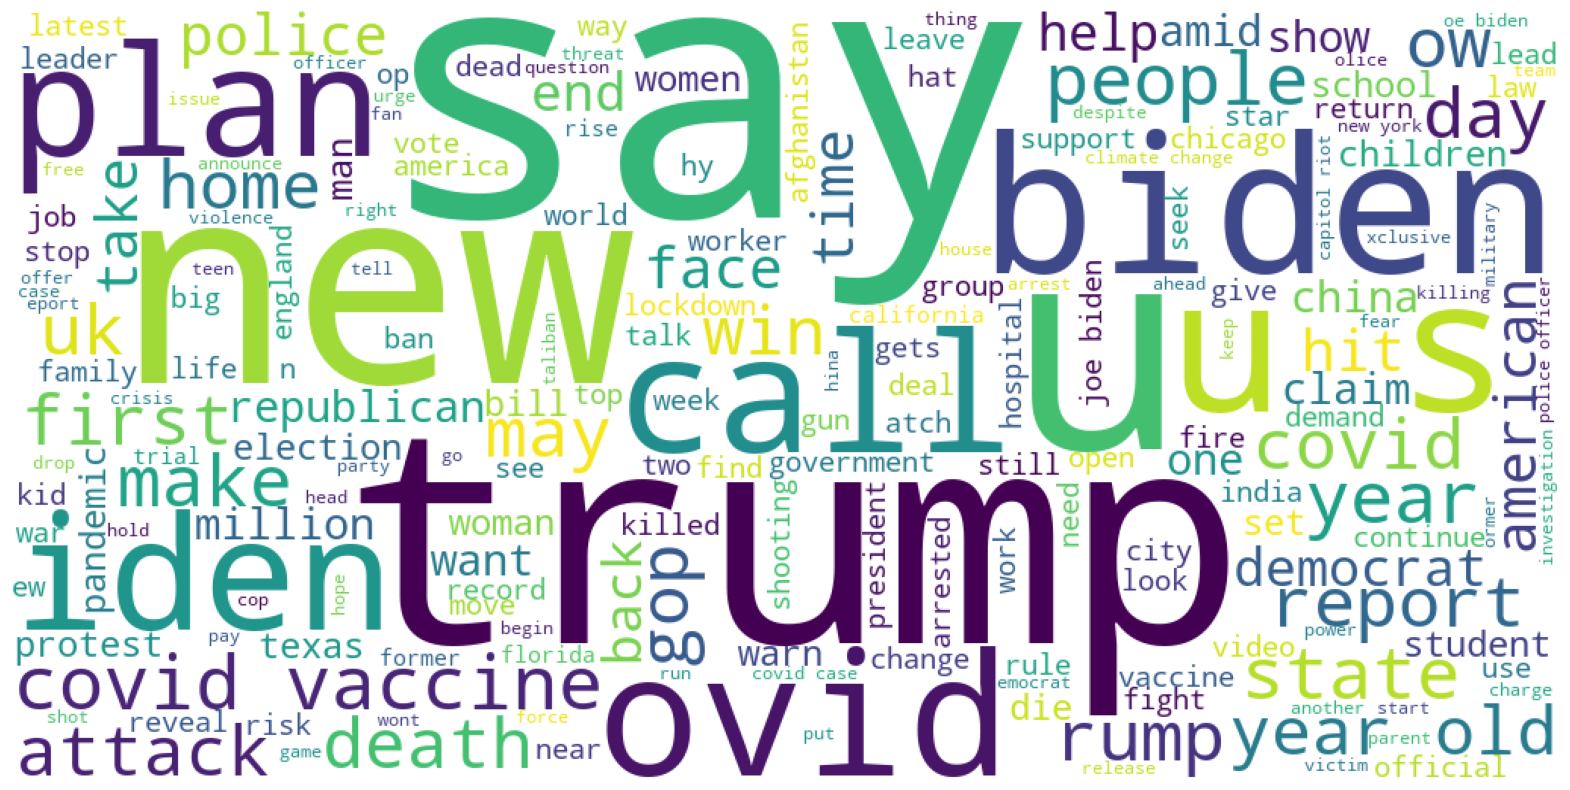

In [26]:
# wordcount

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(
                    background_color = 'white',
                    width = 1024,
                    height = 512
                        ).generate(' '.join(title_corpus))
        
plt.figure(figsize = (20,10))
plt.imshow(wordcloud, 
           aspect='auto'
          ) # image show
plt.axis('off') # to off the axis of x and y
plt.show()

In [27]:
# replicamos para content

content_corpus = []
contents = train_data_eda['content']
for i in tqdm(range(len(titles))):
    content = re.sub('^[a-zA-Z]', ' ', contents[i])

    char_to_replace = ['\'', '"', ':', ',', '`', '´', '’', '”']
    for char in char_to_replace:
        content = content.replace(char, '')
    # title = title.replace("'", '')
    # title = title.replace(":", '')
    content = content.lower()
    content = content.split()
    # quitamos stopwords
    content = [word for word in content if word not in stopwords.words('english')]
    content = ' '.join(content)
    content_corpus.append(content)

100%|██████████| 89795/89795 [1:42:41<00:00, 14.57it/s]  


In [28]:
content_corpus = " ".join(content_corpus).split(" ")
content_corpus[:20]

['ennedy',
 'center',
 'honoree',
 'joan',
 'baez',
 'reflects',
 '60',
 'years',
 'singing',
 'activism',
 '.',
 'speaks',
 '“',
 'cbs',
 '@',
 '@',
 '@',
 '@',
 '@',
 '.']

In [30]:
word_counter = dict(Counter(content_corpus))
title_df_counter = pd.DataFrame(
    data = {
            'word': [word for word in word_counter.keys()],
            'count': [number for number in word_counter.values()]
    }
)
title_df_counter = title_df_counter.sort_values('count', ascending=False)
title_df_counter.head(20)

,word,count
14,@,2916818
10,.,1328308
12,“,233522
94,said,174923
234,people,81606
171,would,69187
119,),68567
116,(,68154
218,one,68117
60,new,65609


In [36]:
title_df_counter['len_word'] = title_df_counter.apply(lambda x: len(x['word']) > 1, axis=1)
clean_title_df_counter = title_df_counter[title_df_counter['len_word'] == True].reset_index(drop=True)
clean_title_df_counter[['word', 'count']].head(20)

,word,count
0,said,174923
1,people,81606
2,would,69187
3,one,68117
4,new,65609
5,also,62969
6,state,49574
7,trump,49377
8,biden,47636
9,president,47185


# detect topics

Vamos a hacer un analisis de tematica y topics